In [1]:
# Problem 1

# Problem Statement: Decision Tree Using the CART Algorithm
# You are given a dataset,“car_evaluation.csv.”Load the dataset into a DataFrame without the header and rename the columns as the list given here -['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'].

# Considering the class column as the target variable, perform the following tasks:

# 1.Explore the target column,class(our task is to predict how the car features affectthe class of car asVery good, Good, Acceptable, or Unacceptable, whichis why we have considered this column as the target column)

# 2.Declare feature vectors and the target variable

# 3.Split the data into test and train fragments using the train_test_split()function in an 80:20 ratio (80% trainand20% test)

# 4.Encode all the ordinal data into numeric values using the category_encoderslibrary

# 5.Predicting the test results using a Decision Tree Classifier based on Gini Index criteria

# 6.Check the accuracy score of the model based on the Gini Index

# 7.Visualize the decision tree

# 8.Show how the importance of features affects the target variable

In [4]:
import pandas as pd
cars = pd.read_csv('car_evaluation.csv')
cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
cars.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
cars

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
cars['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [10]:
# feature vector
x = cars.drop('class', axis=1)
#target
y = cars['class']

In [11]:
#train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [14]:
x_train

,buying,maint,doors,persons,lug_boot,safety
504,high,vhigh,4,more,small,med
533,high,vhigh,5more,more,med,low
1200,med,low,2,4,med,med
1144,med,med,4,4,small,high
1195,med,low,2,2,big,high
...,...,...,...,...,...,...
1424,low,high,2,more,med,low
1142,med,med,4,4,small,low
998,med,high,3,2,small,low
206,vhigh,high,5more,more,small,low


In [15]:
x_test

,buying,maint,doors,persons,lug_boot,safety
805,high,low,3,more,med,high
50,vhigh,vhigh,3,more,big,low
1171,med,med,5more,4,small,high
1177,med,med,5more,4,big,high
395,vhigh,low,4,more,small,low
...,...,...,...,...,...,...
515,high,vhigh,5more,2,med,low
470,high,vhigh,3,4,med,low
573,high,high,3,2,big,med
880,med,vhigh,2,4,big,high


In [16]:
y_train

504     unacc
533     unacc
1200      acc
1144      acc
1195    unacc
        ...  
1424    unacc
1142    unacc
998     unacc
206     unacc
867     unacc
Name: class, Length: 1381, dtype: object

In [17]:
y_test

805       acc
50      unacc
1171      acc
1177    vgood
395     unacc
        ...  
515     unacc
470     unacc
573     unacc
880       acc
107     unacc
Name: class, Length: 346, dtype: object

In [19]:
import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

In [20]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [21]:
import category_encoders as ce

In [22]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [23]:
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

In [24]:
x_train_encoded

,buying,maint,doors,persons,lug_boot,safety
504,1,1,1,1,1,1
533,1,1,2,1,2,2
1200,2,2,3,2,2,1
1144,2,3,1,2,1,3
1195,2,2,3,3,3,3
...,...,...,...,...,...,...
1424,3,4,3,1,2,2
1142,2,3,1,2,1,2
998,2,4,4,3,1,2
206,4,4,2,1,1,2


In [25]:
x_test_encoded

,buying,maint,doors,persons,lug_boot,safety
805,1,2,4,1,2,3
50,4,1,4,1,3,2
1171,2,3,2,2,1,3
1177,2,3,2,2,3,3
395,4,2,1,1,1,2
...,...,...,...,...,...,...
515,1,1,2,3,2,2
470,1,1,4,2,2,2
573,1,4,4,3,3,1
880,2,1,3,2,3,3


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier(criterion='gini')

In [28]:
clf

DecisionTreeClassifier()

In [29]:
clf.fit(x_train_encoded, y_train)

DecisionTreeClassifier()

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

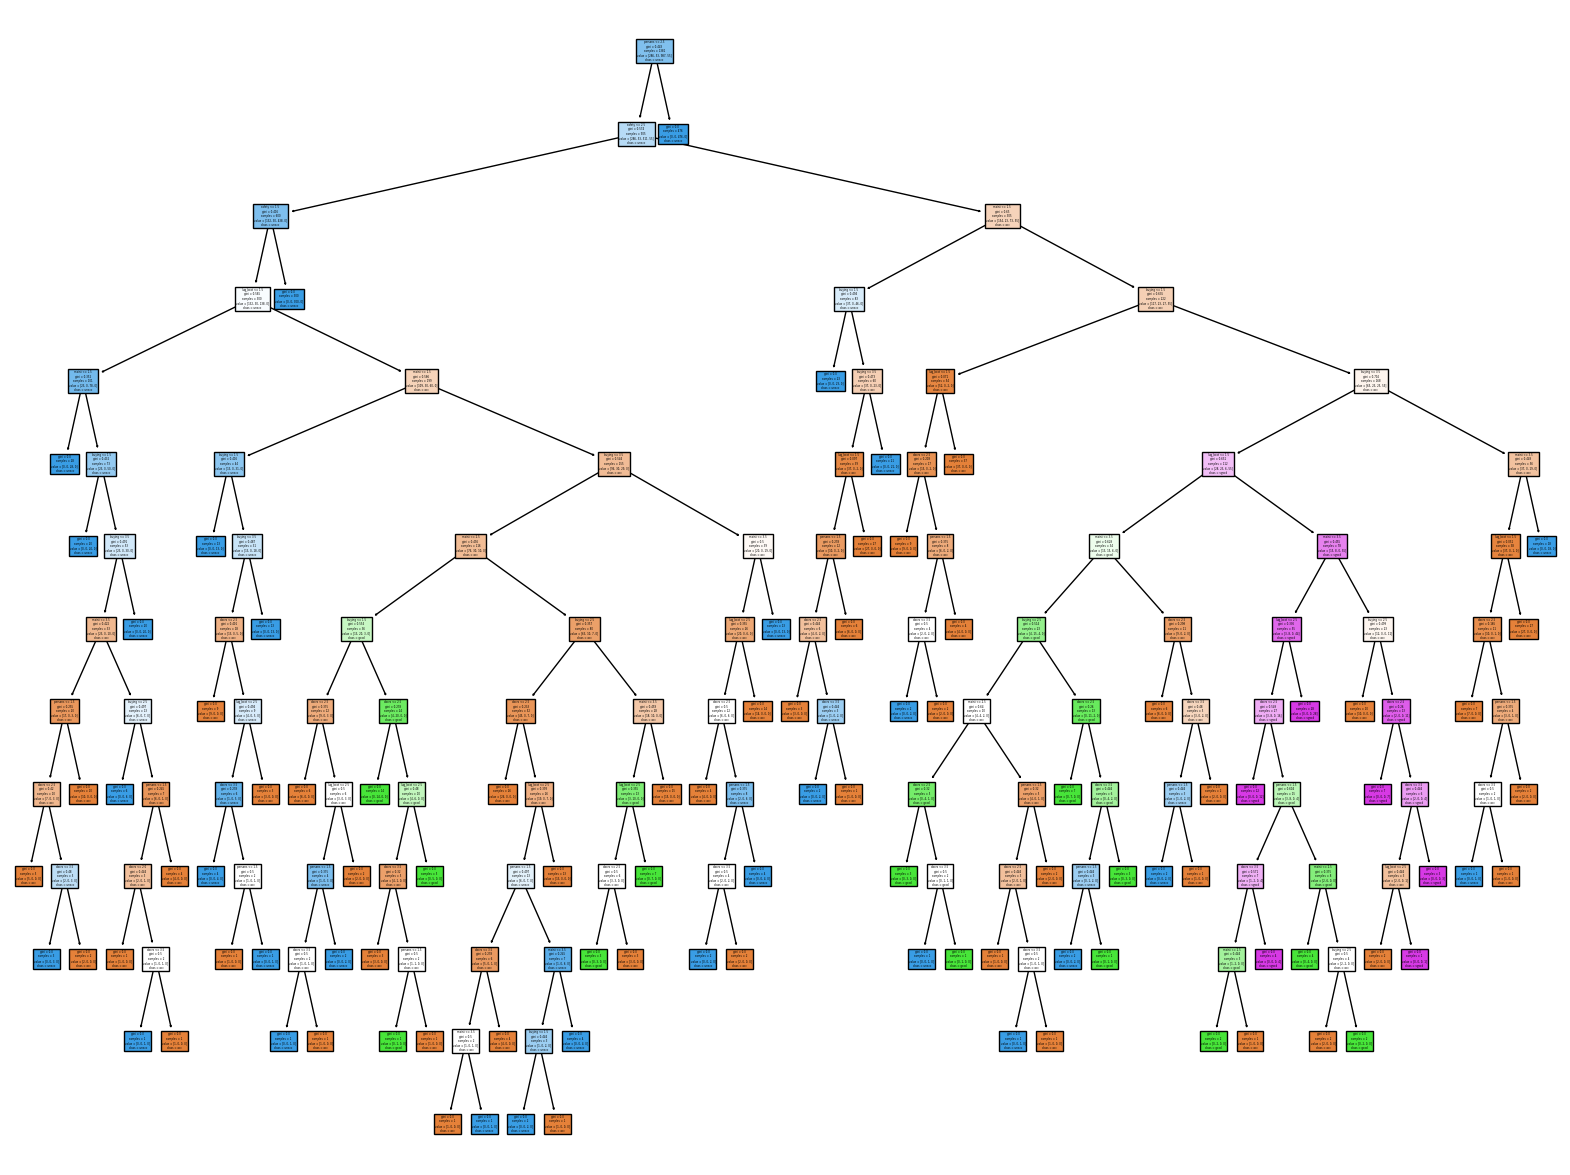

In [42]:
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=x_train_encoded.columns.tolist(), class_names=clf.classes_.tolist(), filled=True)
plt.show()

In [37]:
x_train_encoded.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [45]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9855491329479769

In [46]:
feature_importance = pd.DataFrame({'Feature': x_train_encoded.columns, 'Importance': clf.feature_importances_})
feature_importance


,Feature,Importance
0,buying,0.233285
1,maint,0.173192
2,doors,0.079067
3,persons,0.175657
4,lug_boot,0.100157
5,safety,0.238642


In [47]:
# Problem 2
# Problem Statement: Random Forest
# Write a Python program that reads the TaxiFare.csv file into a DataFrame and build a good random forest model by performing the following tasks:

# 1.Load the TaxiFare.csvdataset into a DataFrame

# 2.Drop ‘unique_id’, and find missing values from the dataset

# 3.Convert the ‘date_time_of_pickup’ column to date and time format and extract information and create new columns as ‘hour‘, ‘dayOfTheMonth’,’ month’, ‘dayOfTheWeek’.

# 4.Find traveling distance based on given coordinates using the "Haversine" distance formula and create anew column as ‘distance’ and store the data.

# Note:The Haversine formula calculates the shortest distance between two points on a sphere using their latitudes and longitudes measured along the surface. It is important for use in navigation.

# 5.Eliminate some anomalous/outlier data based on certain "Domain" logic

# A.Amount < 2.5 as the minimum fare is 2.5

# B.Trips with travel distance less than or equal to 1, and more than 130 Kms. Let’s say this was a condition provided by clients based on travel range.

# 6.Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

# 7.Find important features using random forest.

# 8.Build a model and predict the result for the test dataset based on MAPE and RMSE

# use this function to calculate distance
# def haversine(lat1, lon1, lat2, lon2):

# # distance between latitudes
# # and longitudes
# dLat = (lat2 - lat1) * math.pi / 180.0
# dLon = (lon2 - lon1) * math.pi / 180.0

# # convert to radians
# lat1 = (lat1) * math.pi / 180.0
# lat2 = (lat2) * math.pi / 180.0

# # apply formulae
# a = (pow(math.sin(dLat / 2), 2) +
#      pow(math.sin(dLon / 2), 2) *
#          math.cos(lat1) * math.cos(lat2));
# rad = 6371
# c = 2 * math.asin(math.sqrt(a))
# return rad * c
# [ ]


In [48]:
df = pd.read_csv("TaxiFare.csv")
df

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
0,26:21.0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,4.5
1,52:16.0,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,16.9
2,35:00.0,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,5.7
3,30:42.0,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,7.7
4,51:00.0,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,5.3
...,...,...,...,...,...,...,...,...
49995,25:15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,15.0
49996,19:18.0,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,7.5
49997,53:00.0,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,6.9
49998,09:00.0,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,4.5


In [49]:
# drop 'unique_id' and check for missing values
df.drop('unique_id', axis=1, inplace=True)
missing=df.isnull().sum()
missing


date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
amount                  0
dtype: int64

In [50]:
# 'date_time_of_pickup' column to date and time format
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df['hour'] = df['date_time_of_pickup'].dt.hour
df['dayOfTheMonth'] = df['date_time_of_pickup'].dt.day
df['month'] = df['date_time_of_pickup'].dt.month
df['dayOfTheWeek'] = df['date_time_of_pickup'].dt.dayofweek

In [51]:
df

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,hour,dayOfTheMonth,month,dayOfTheWeek
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,4.5,17,15,6,0
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16.9,16,5,1,1
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,5.7,0,18,8,3
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,7.7,4,21,4,5
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,5.3,7,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,15.0,23,12,6,2
49996,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,7.5,17,22,6,0
49997,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,6.9,4,30,1,6
49998,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,4.5,7,6,11,1


In [55]:
# distance
import math
def haversine(lat1, lon1, lat2, lon2):
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
    a = (pow(math.sin(dLat / 2), 2) + pow(math.sin(dLon / 2), 2) * math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance'] = df.apply(lambda row: haversine(row['latitude_of_pickup'], row['longitude_of_pickup'], row['latitude_of_dropoff'], row['longitude_of_dropoff']), axis=1)


In [53]:
df.columns

Index(['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'amount', 'hour', 'dayOfTheMonth', 'month', 'dayOfTheWeek'],
      dtype='object')

In [56]:
df

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,hour,dayOfTheMonth,month,dayOfTheWeek,distance
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,4.5,17,15,6,0,1.030764
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16.9,16,5,1,1,8.450134
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,5.7,0,18,8,3,1.389525
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,7.7,4,21,4,5,2.799270
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,5.3,7,9,3,1,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,15.0,23,12,6,2,4.940374
49996,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,7.5,17,22,6,0,0.874706
49997,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,6.9,4,30,1,6,2.263286
49998,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,4.5,7,6,11,1,0.665245


In [60]:
# remove outliers
df = df[(df['amount'] >= 2.5) & (df['distance'] > 1) & (df['distance'] < 130)]
df


,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,hour,dayOfTheMonth,month,dayOfTheWeek,distance
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,4.5,17,15,6,0,1.030764
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16.9,16,5,1,1,8.450134
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,5.7,0,18,8,3,1.389525
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,7.7,4,21,4,5,2.799270
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,5.3,7,9,3,1,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2011-12-07 21:42:00+00:00,-73.998573,40.719868,-73.967462,40.793382,1,17.3,21,7,12,2,8.584130
49993,2011-04-07 14:27:00+00:00,-73.982363,40.765060,-73.969167,40.761268,1,7.3,14,7,4,3,1.188675
49994,2012-10-13 19:57:00+00:00,-73.976212,40.744832,-73.981567,40.724635,1,8.5,19,13,10,5,2.290679
49995,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,15.0,23,12,6,2,4.940374


In [61]:
# independent and dependent variables
x = df.drop(['date_time_of_pickup', 'amount'], axis=1)
y = df['amount']

In [62]:
x

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,dayOfTheMonth,month,dayOfTheWeek,distance
0,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,0,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,3,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,5,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,1,1.999157
...,...,...,...,...,...,...,...,...,...,...
49989,-73.998573,40.719868,-73.967462,40.793382,1,21,7,12,2,8.584130
49993,-73.982363,40.765060,-73.969167,40.761268,1,14,7,4,3,1.188675
49994,-73.976212,40.744832,-73.981567,40.724635,1,19,13,10,5,2.290679
49995,-73.999973,40.748531,-74.016899,40.705993,1,23,12,6,2,4.940374


In [63]:
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49989    17.3
49993     7.3
49994     8.5
49995    15.0
49997     6.9
Name: amount, Length: 40930, dtype: float64

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [65]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [66]:
rf

RandomForestRegressor(random_state=42)

In [67]:
rf.fit(x, y)

RandomForestRegressor(random_state=42)

In [68]:
feature_importances = rf.feature_importances_

In [69]:
feature_importances

array([0.02909742, 0.02170614, 0.04638334, 0.03175538, 0.00367098,
       0.01329474, 0.0126442 , 0.00875014, 0.00696154, 0.82573612])

In [70]:
for i, column in enumerate(x.columns):
    print(f"{column}: {feature_importances[i]}")

longitude_of_pickup: 0.029097420416505534
latitude_of_pickup: 0.02170613950934791
longitude_of_dropoff: 0.04638334054786826
latitude_of_dropoff: 0.03175537748857745
no_of_passenger: 0.003670981761670449
hour: 0.013294740412012573
dayOfTheMonth: 0.012644203631100352
month: 0.008750141332061024
dayOfTheWeek: 0.006961535231804979
distance: 0.8257361196690515


In [71]:
#train-test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [72]:
x_train

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,dayOfTheMonth,month,dayOfTheWeek,distance
43810,-73.973376,40.743913,-73.947102,40.779919,1,19,9,7,4,4.574519
17595,-73.973875,40.757753,-73.957405,40.769895,1,23,8,10,5,1.935690
16605,-73.955437,40.782502,-73.964172,40.765477,3,7,28,9,4,2.030969
42395,-73.968490,40.770358,-73.984104,40.749175,1,23,22,12,2,2.697697
27311,-73.776860,40.645320,-73.715908,40.699028,1,15,14,7,0,7.879695
...,...,...,...,...,...,...,...,...,...,...
6786,-74.003502,40.732532,-73.998550,40.745260,1,21,23,11,4,1.475503
43706,-73.994896,40.740170,-73.956720,40.776644,1,18,24,5,4,5.175707
24947,-73.955765,40.776123,-73.982078,40.741709,2,1,18,10,6,4.422111
22733,-73.962012,40.767755,-73.989207,40.743157,1,21,31,12,4,3.567665


In [73]:
x_test

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,dayOfTheMonth,month,dayOfTheWeek,distance
42763,-73.959457,40.762849,-73.977266,40.759273,1,8,10,12,3,1.551745
14326,-74.006222,40.734204,-74.001779,40.755758,1,12,30,6,6,2.425746
34016,-73.997310,40.729852,-73.947255,40.779835,4,7,20,6,4,6.976106
28462,-73.977219,40.779736,-73.965469,40.801270,1,17,15,1,3,2.590722
7644,-74.007380,40.705212,-74.008145,40.731067,2,18,6,6,2,2.875668
...,...,...,...,...,...,...,...,...,...,...
9908,-73.892020,40.748937,-73.919081,40.750494,1,7,23,11,6,2.286123
4515,-73.996089,40.753959,-73.978456,40.720730,1,20,31,1,6,3.982384
16155,-74.005203,40.707153,-73.987954,40.749846,2,14,13,8,3,4.964770
29747,-73.970696,40.755964,-73.995920,40.759201,1,23,5,12,5,2.154836


In [74]:
y_train

43810     8.5
17595     6.1
16605     7.5
42395     6.1
27311    26.0
         ... 
6786      6.5
43706    14.5
24947     9.7
22733    10.9
43554     8.5
Name: amount, Length: 32744, dtype: float64

In [75]:
y_test

42763     8.10
14326     8.00
34016    16.50
28462     8.00
7644      8.50
         ...  
9908      8.00
4515     10.90
16155    17.70
29747     8.50
31830    49.33
Name: amount, Length: 8186, dtype: float64

In [76]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [77]:
rf_model

RandomForestRegressor(random_state=42)

In [78]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
y_pred = rf_model.predict(x_test)

In [81]:
y_pred

array([ 8.294 ,  9.4053, 18.737 , ..., 16.421 ,  9.1823, 38.7148])

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)


In [83]:
mape

0.18210088779102204

In [85]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [86]:
rmse

3.468987230153562